#### INTRODUCTION

Bias: 
    
    The difference between an actual values and average predictede values.
    High bias means high error in the model. This type of biasness does not work both on training and testing data
    
Variance:
    • Variance tells how the trained model will change on new testing data.
    High variance performs well on only training data and fail on test data. This is simply overfitting.

#### REGULARIZATION

Regularization helps to solve the problem of overfitting and high variance. Also, to avoid model complexity by shrinking or reducing the values of the coefficients.
It simplifies a model by adding a penalty.

Regularization has two techniques: Ridge and Lasso regression.

### RIDGE REGRESSION

Ridge Regression idea: If data does not fit well on the testing data,then it should also not fit well on the training data as well.

In this way, Ridge regression will find a new line which will not fit the training data as well by introducing a small amount of bias.

Ridge Regression is a technique used to avoid data complexities from multicollinearity (independent variables are highly correlated). Multicollinearity essentially occurs when there are high correlations between more than two predicted variables.
https://www.engati.com/glossary/ridge-regression#:~:text=Ridge%20Regression%20is%20a%20technique,shrinkage%20parameter%20λ%20(lambda)


### This section will compare the performances of linear, Ridge and Lasso regressions.

In [42]:
# Import the libraries needed

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# import the dataset
dataset = pd.read_csv('/Users/lambertagunbiade/Desktop/SUPERVISED MACHINE LEARNING /Weight.csv')
dataset

,Height,Weight
0,170.0,60.000
1,169.6,59.100
2,168.4,58.170
3,162.0,54.000
4,163.0,55.500
5,169.0,59.600
6,162.5,55.250
7,169.1,58.733
8,169.0,58.500
9,163.0,55.700


This is a dataset of height (in cm) and expected weight(kg) of an individual respectively.

#### Separate the target(price) variable from the predictors

In [44]:
X = dataset.iloc[0:,0].values  # height of an individual
Y = dataset.iloc[0:,1].values  # weight of an individual

##### First, let us build a linear model, predict and see R square value.

In [45]:
# Split the data set into training and testing data

X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.6, random_state=0)

To buttress our point, we chose the test data to be of a higher ratio (0.6) to the training data.

#### Transform the training and testing data into a two dimentional array

In [46]:
X_train1 = np.reshape(X_train, (-1,1))
Y_train1 = np.reshape(Y_train, (-1,1))

X_test1 = np.reshape(X_test, (-1,1))
Y_test1 = np.reshape(Y_test, (-1,1))

### Instantiate the linear regression class and fit the model on the training data


In [47]:
lin_regressor = LinearRegression()

# fit the transformed form of our training data
lin_regressor.fit(X_train1, Y_train1)

LinearRegression()

#### Model prediction

In [48]:
# Training data predicition
y_pred_train1 = lin_regressor.predict(X_train1)
# Test data prediction
y_pred_test1 = lin_regressor.predict(X_test1)

In [49]:
print('Actual weight\n\n', Y_test1,'\n\n Predicted weight\n\n', y_pred_test1.round(2))

Actual weight

 [[58.17]
 [58.5 ]
 [55.5 ]
 [55.7 ]
 [59.1 ]
 [55.25]] 

 Predicted weight

 [[58.73]
 [59.17]
 [54.74]
 [54.74]
 [59.62]
 [54.37]]


The model looks perfect for the predicition of weight of an individual with respect to the height but let us view this in a scatterplot for both the training and testing data.

#### Scatterplot for training data

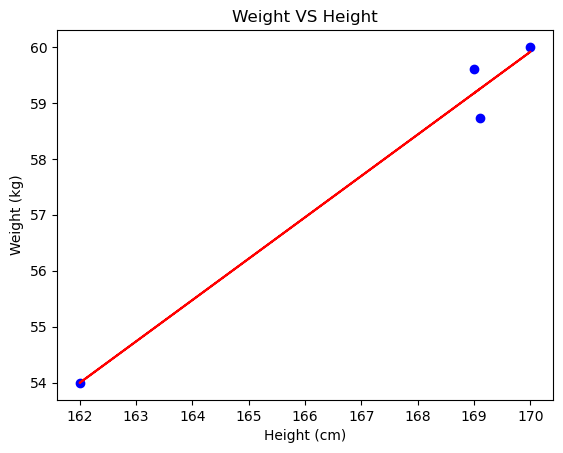

In [50]:
plt.scatter(X_train1,Y_train1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_train1,lin_regressor.predict(X_train1),color='red') 
        
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight VS Height')

plt.show()

The model shows a good fit for the training data as the data points are very close to the regression line.
Let us see the r square value for the training data.

#### R Square value

In [51]:
# Import r sqaured library and create an object of it thus;
from sklearn.metrics import r2_score

In [52]:
# R_Squared value for the trained and predicted trained values
r_square_test = r2_score(Y_train1,y_pred_train1)
r_square_test.round(2)

0.98

The r sqaure value is 98%.

#### Scatterpot and R square value for test data 

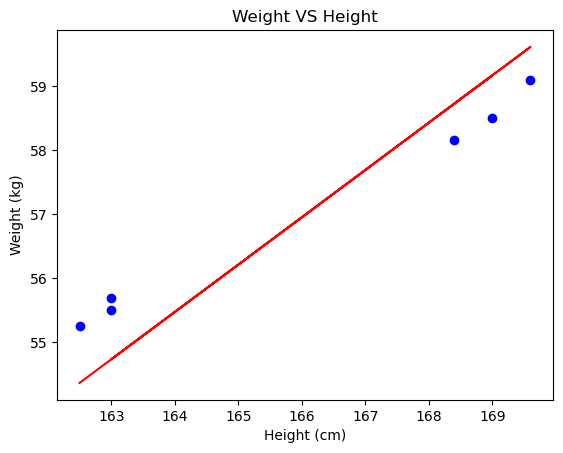

In [54]:
plt.scatter(X_test1,Y_test1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_test1,lin_regressor.predict(X_test1),color='red') 
        
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight VS Height')

plt.show()

The model performance the test data can not be compared to that of the training data. The data points are not very close. Let us see the r square value.

In [55]:
# R_Squared value for the trained and predicted trained values
r_square_test = r2_score(Y_test1,y_pred_test1)
r_square_test.round(2)

0.78

The R Square value of the test data is not too bad, however,one can tell the discrepancy between the R square value between training and testing data.

The penalty(Value of Alpha) in Ridge regression will reduce the overfitting in the training data and improve the model performance performance on the testing data in the next session.

### RIDGE REGRESSION

In [77]:
# import the ridge regression class
from sklearn.linear_model import Ridge

### Now train the model with the imported ridge regression class and pass alpha as the argument.

NOTE: Try different values of alpha. Select the one with the least difference between the values of r square of the training and testing data. 

Note: The higher the value of Alpha(penalty), the further over fitted training data points will move from the regression line. In this case, Alpha = 9 gave the best proximity in the variation between the training and testing data R Squared values.

In [78]:
rid = Ridge(alpha = 9)
rid.fit(X_train1, Y_train1)

Ridge(alpha=9)

#### Model predicition

In [79]:
# Training data prediction
y_pred_ridge_train = rid.predict(X_train1)

# Testing data prediction
y_pred_ridge_test = rid.predict(X_test1)

#### Compare the new predicted weights by the model.

In [80]:
print('Actual weight\n\n', Y_test1,'\n\n Predicted weight\n\n', y_pred_ridge_test.round(2))

Actual weight

 [[58.17 ]
 [58.5  ]
 [55.5  ]
 [55.7  ]
 [59.1  ]
 [55.25 ]
 [58.733]] 

 Predicted weight

 [[58.74]
 [59.11]
 [55.38]
 [55.38]
 [59.48]
 [55.07]
 [59.17]]


• We have seen better proximity in comparison with the predicted values using linear regression.

### Data visualization

###### scatter plot for  Training data 

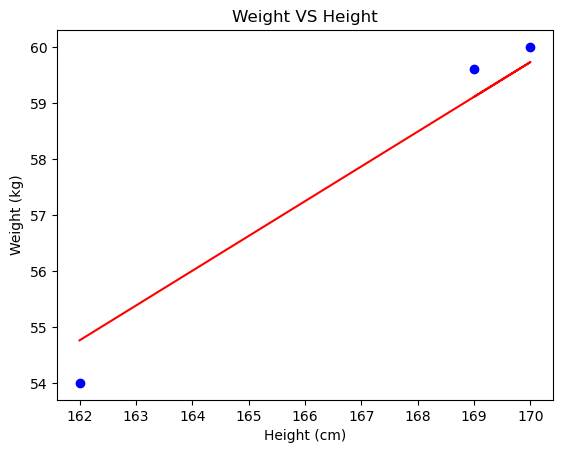

In [81]:
plt.scatter(X_train1,Y_train1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_train1,rid.predict(X_train1),color='red') 
        
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight VS Height')

plt.show()

 We have seen a little deviation of the training data points from the regression line after a penalty was introduced. There by reducing over fitting of the training data.
 
Recall that before the introduction of biasness, the predicted or regression line fitted the training data points with almost 100% accuracy.

###### scatter plot for  Test data 

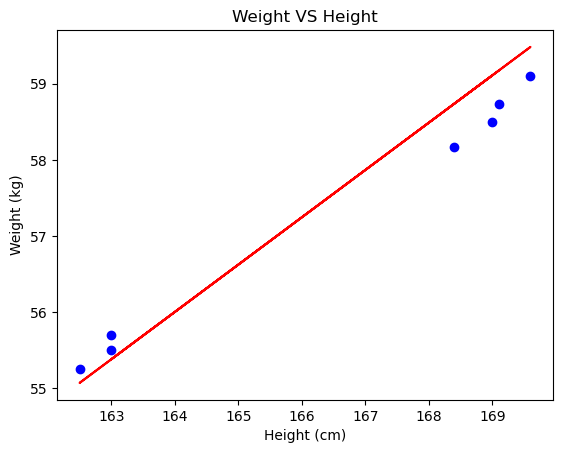

In [82]:
plt.scatter(X_test1,Y_test1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_test1,rid.predict(X_test1),color='red') 
        
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight VS Height')

plt.show()

This scatter plot showed a better result with the test data now closer to the regression line than.

#### R Squared values

In [83]:
# Training data r square value
r_square_train = r2_score(Y_train1, y_pred_ridge_train)

# Testing data r square value
r_square_test = r2_score(Y_test1, y_pred_ridge_test)

print('R square values:- goodness of fit')
print('Training data: ', r_square_train.round(3),'Testing data: ',r_square_test.round(3) )

R square values:- goodness of fit
Training data:  0.96 Testing data:  0.933


It is awesome to see how the accuracy of testing data increased from 78% to 95%
And the reduction of the training data accuracy. The model is has performed significantly for both dataset. Hence we can trust the model to predict unforseen or futre data.

#### Let us build a template for our model to predict weight with any value of height.

In [84]:
height = 180

tran_height = np.reshape(height,(1,1))
pred_weight = rid.predict(tran_height)

print(pred_weight.round(2))

[[65.94]]


### LASSO REGRESSION

Lasso regression also makes a model simpler by reducing complexity. It avoids overfitting and high variance. Just like Ridge regression. 
Lasso regression simplifies the model by reducing the magnitude of the coefficient. When the magnitude of coefficient reduces, it ultimately reduces the computational power by adding penalty.
NOTE: In fitting our model, the value of Alpha(labda) denotes the severity of a penalty.

NOTE:::::: By adding the penalty using Lasso Regression Equation, the value of the coefficient can be reduced or shrinked to zero. When this happens, the associated independent variable to the coefficient becomes zero as well. It simply means it is a least contributing to the target or dependent variable and such should be removed from the model. Thus making the model simple.

This is different in the case of Ridge regression equation, the coefficient can be reduced or shrinked close to zero but never exactly zero.



In [85]:
# import the ridge regression class
from sklearn.linear_model import Lasso

In [86]:
X = dataset.iloc[0:,0].values  # height of an individual
Y = dataset.iloc[0:,1].values  # weight of an individual

In [87]:
# Split the data set into training and testing data

X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.7, random_state=0)

#### Transform the training and testing data into a two dimentional array

In [88]:
X_train1 = np.reshape(X_train, (-1,1))
Y_train1 = np.reshape(Y_train, (-1,1))

X_test1 = np.reshape(X_test, (-1,1))
Y_test1 = np.reshape(Y_test, (-1,1))

#### Instantiate the Lasso regression class and fit the model on the training data

In [102]:
lass = Lasso(alpha = 2) # Note: The choice of alpha is quite sensitive.
lass.fit(X_train1, Y_train1)

Lasso(alpha=2)

**Note that the choice of alpha=2 gave least difference between the training and testing data.**

#### Model predicition

In [103]:
# Training data prediction
y_pred_lasso_train = lass.predict(X_train1)

# Testing data prediction
y_pred_lasso_test = lass.predict(X_test1)

#### Compare the actual price vs the price predicted

In [104]:
print('Actual weight\n\n', Y_test1,'\n\n Predicted weight\n\n', y_pred_lasso_test.round(2))

Actual weight

 [[58.17 ]
 [58.5  ]
 [55.5  ]
 [55.7  ]
 [59.1  ]
 [55.25 ]
 [58.733]] 

 Predicted weight

 [58.72 59.09 55.42 55.42 59.45 55.12 59.15]


This shows better proximity than Ridge regression but let us see the datasets on a scatter plot.

### DATA VISUALIZATION

###### scatter plot for  Training data 

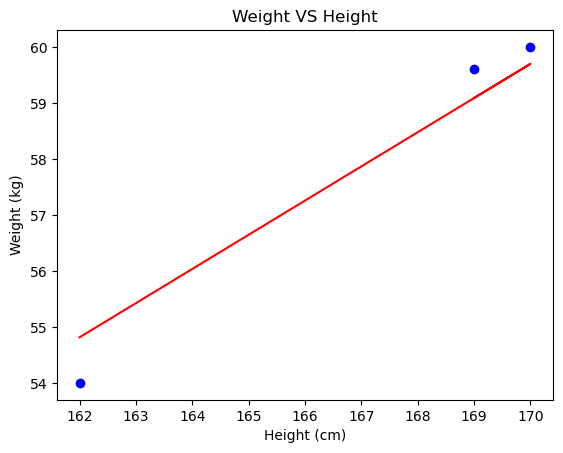

In [105]:
plt.scatter(X_train1,Y_train1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_train1,lass.predict(X_train1),color='red') 
        
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight VS Height')

plt.show()

The regression does not fit the data with much accuracy unlike deviates unlike when no penalty was introduced.

###   scatter plot for  Test data 

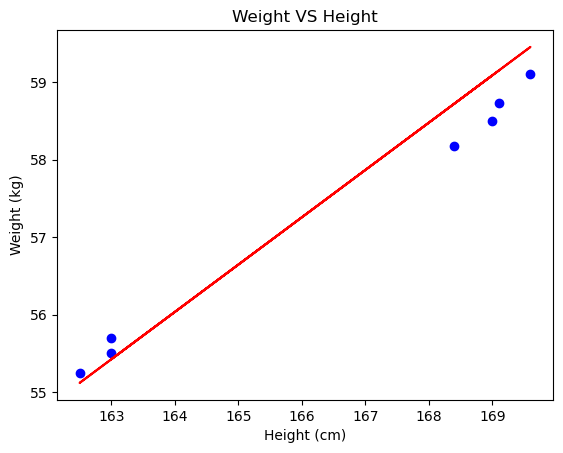

In [106]:
plt.scatter(X_test1,Y_test1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_test1,lass.predict(X_test1),color='red') 
        
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight VS Height')

plt.show()

#### R Squared values

In [107]:
# Training data r square value
lasso_r_square_train = r2_score(Y_train1, y_pred_lasso_train)

# Testing data r square value
lasso_r_square_test = r2_score(Y_test1, y_pred_lasso_test)
      
print('R square values:- goodness of fit')
print('Training data: ', lasso_r_square_train.round(3),'Testing data: ',lasso_r_square_test.round(3) )

R square values:- goodness of fit
Training data:  0.955 Testing data:  0.94


We have succeeded in reducing the overfitting in the training data and differences in the performance of our model on both the training and testing data has now been reduced. 

### Let us build a template for our model to predict weight with any value of height Lasso, Ridge and Linear regression

Here we will predict the weight with any value of height entered in 'cm'

#### For Lasso Regression

In [108]:
height = 180

transformed_height = np.reshape(height,(1,1))
predicted_weight = lass.predict(transformed_height)

print(predicted_weight.round(2))

[65.8]


Here, the model has predicted the weight of an individual of height 180cm to be 65.8KG.

#### For Ridge Regression

In [110]:
height = 180

tran_height = np.reshape(height,(1,1))
pred_weight = rid.predict(tran_height)

print(pred_weight.round(2))

[[65.94]]


Ridge predicted weight is 0.14KG higher than Lasso

#### For Linear Regression

In [111]:
height = 180

tran_height = np.reshape(height,(1,1))
pred_weight = lin_regressor.predict(tran_height)

print(pred_weight.round(2))

[[67.31]]


The predicted weight by the Linear regression is a bit higher than any of those two.

**Comparing the models’ performances of how well the data fit the regression line respectively.**

•The proportions of variances in the dependent variable that can be explained by the independent variable’s’ in the Linear, Ridge and Lasso regressions are as follows.


#### Linear Regression

Training and test data R Squared values were 98% and 78%. This shows that the model failed to perform well on the test data. However, 78% is not bad. However, the model's performance on the train data is 20% more efficient than the test data.

#### Ridge Regression

The Ridge regression has introduced some biasness (alpha = 9) and boosted the performance of the model on the test data as follows:
R Squared value on training data was 96% and Testing data was 93%.
This is a great performance with a difference of 3% on the model's performance on the training data compared to the the test data.

#### Lasso Regression

Lasso seems too perfect than one expected as the performance of the model on a penalty of 2 gave the best goodness of fit as we see R Squared values for the training and testing data were 95% and 94% respectively.
The difference between values of both the testing and training data was just 1%.